In [24]:
import urllib  
import requests
from bs4 import BeautifulSoup
import json
import os
#urllib、requests都是爬取数据的基本库，只是两者的爬取方式不同
#BeautifulSoup是解析网络文本的工具库

输入您需要查找的图片主题
pig
https://www.google.com/search?site=&tbm=isch&source=hp&biw=1873&bih=990&q=pig
<!DOCTYPE doctype html>
<html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="zh-TW">
 <head>
  <meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/>
  <meta content="origin" name="referrer"/>
  <title>
   pig - Google 搜尋
  </title>
  <script nonce="CN/4/P12KqG5Wua0en9XOA==">
   (function(){window.google={kEI:'kfh0XYmJLoXWhwOUt65w',kEXPI:'0,1353746,2015,1641,2007,730,224,510,19,1046,3151,379,206,1017,54,1430,577,2,124,10,713,338,161,378,1132069,1197699,329569,1294,7105,180,3382,1716,1604,2044,314,893,633,1770,1137,4795,1334,3650,314,744,1744,328,5033,10931,278,1192,14056,867,7049,2445,2646,23,770,845,4693,6615,3598,369,3314,5505,2436,1525,1800,512,2111,1119,2,578,728,2432,1361,4323,4967,774,2251,6879,7178,670,1049,1808,1478,7,491,10953,5297,2016,38,920,873,1216,1365,1195,416,2736,48,3013,2,631,2403,837,694,448,12,359,2,505,12,5,7,602
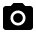
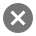
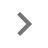
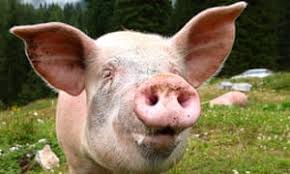
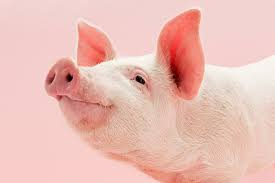
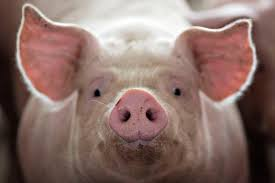
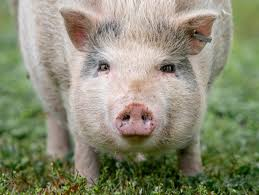
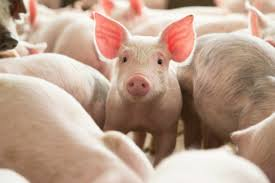
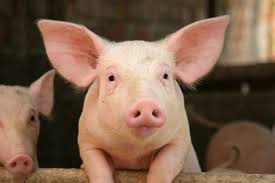
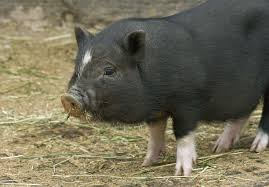
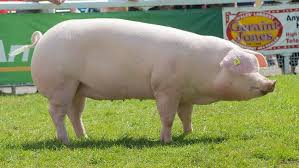

In [5]:
###输入需要搜索的东西 自动请求网页信息 返回网页源码

#定义网站的名字 可以自定义任何一个网站 这里用的是谷歌图片
GOOGLE_IMAGE = \
    'https://www.google.com/search?site=&tbm=isch&source=hp&biw=1873&bih=990&'
#获取输入的数据
print('输入您需要查找的图片主题')
data=input()
#将data转换成字典
data={'q':data}
#将输入数据变成网页格式 此函数仅编码两元素元组或字典
search=urllib.parse.urlencode(data)
#拼接得到最终的网址
search=GOOGLE_IMAGE+search

#请求之前先伪装成浏览器，需要定义头部信息
usr_agent = {
    'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.64 Safari/537.11',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
    'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
    'Accept-Encoding': 'none',
    'Accept-Language': 'en-US,en;q=0.8',
    'Connection': 'keep-alive',
    }
#利用头部信息，生成一个请求
Req=urllib.request.Request(search,headers=usr_agent)
#提交请求
response = urllib.request.urlopen(Req)
#获取源代码
html=response.read()

#将源代码按html格式输出
soup = BeautifulSoup(html, 'html.parser') #'html.parser'代表的是采用的解析器


In [8]:
results=soup.findAll('div',{"class":'rg_meta'})

In [42]:
links=soup.findAll('a')
links[0]
re=links[0].get('href')
print("https://wallpaperscraft.com/image/" + re[31:-10] + '_'
                  + re[-9:] + '.jpg')

https://wallpaperscraft.com/image/&bih=990&gbv=1&sei=0QF1XfqBO4_EoASh4J0Q.jpg


In [23]:
results[0]
#将json对象转化成python对象,得到其中的链接信息
link=json.loads(results[0].text)['ou']
#发送链接请求
rs=requests.get(link)
#将链接内容存入新的文件中
with open('img0','w') as f:
    f.write(str(rs.content))

In [36]:
##从壁纸网站下载该壁纸
usr_agent = {
    'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.64 Safari/537.11',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
    'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
    'Accept-Encoding': 'none',
    'Accept-Language': 'en-US,en;q=0.8',
    'Connection': 'keep-alive',
    }
WALLPAPERS_KRAFT = 'https://www.58pic.com/'#壁纸网站地址
data=input()
sq={'q':data}
#编码成网页需要的形式
search=urllib.parse.urlencode(sq)
#连接成网页地址
g=WALLPAPERS_KRAFT+str(data)
g
#生成网页请求
#re=urllib.request.Request(g,headers=usr_agent)
#提交请求
#respons=urllib.request.urlopen(re)
#获取源代码
#html=respons.read()
#将源代码解码成html的格式
#soup=BeautifulSoup(html,'html.parser')


pig


'https://www.58pic.com/pig'